<a href="https://colab.research.google.com/github/AmiMunshi/Data-compression-using-python/blob/master/Image_Compression_with_DCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
import random

In [2]:
#Function to implement 2D DCT and IDCT
def dct2(a):
    return dct(dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return idct(idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

DCT and IDCT on a random matrix

In [6]:
# Generating random matrix of given size
mat= np.random.randint(100,size=(4,4))
print(mat)

[[39 48 59 91]
 [ 9  7 90 37]
 [28 73 49 18]
 [99 46 15 22]]


In [7]:
#Applying 2D DCT on the generated matrix by calling dct2 function
matdct= dct2(mat)
print(matdct)

[[182.5         -2.99017679 -11.          13.68608208]
 [ 14.58276514 -77.03122292  -8.7032318   11.25304833]
 [ 27.          24.73417485  52.5        -19.98676048]
 [ 15.60746491   9.25304833 -13.17208246 -40.96877708]]


In [9]:
# Obtaining original matrix by applying idct2 function on the dct trasnformed matrix
matidct= idct2(matdct)
matidct=matidct.round().astype(int)
print(matidct)

[[39 48 59 91]
 [ 9  7 90 37]
 [28 73 49 18]
 [99 46 15 22]]


DCT on image with and without compression

In [10]:
img = cv2.imread('/cameraman.png',0)  # Read the image
m,n= img.shape #Find and store size of image in m,n

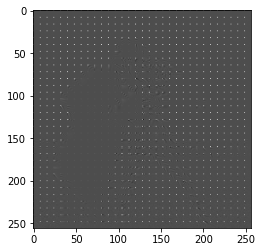

In [11]:
#Find DCT of the given image using DCT function 
N= 8 #Size of the block
imgdct = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):
               imgdct[row*N:(row+1)*N,col*N:(col+1)*N]= dct2(img[row*N:(row+1)*N,col*N:(col+1)*N])
plt.imshow(imgdct, cmap="gray")


In [13]:
x,y= imgdct.shape #obtain size of dct transformed matrix
print(x,y)

256 256


In [14]:
#For compression, retaining only P percent coefficients with max magnitude. 

imgthresh= np.zeros((x,y), dtype= int)
B= abs(imgdct)
B=B.flatten()
B= np.sort(B)
P= 2 #Percent of coefficients to be retained with the max magnitude
n= int((1-P/100)*(x*y)) 
retain= B[n: len(B)] # Retaining top P percent coefficients

for row in range(x):
  for col in range(y):
    
    if imgdct[row,col] in retain:
      imgthresh[row,col]= imgdct[row,col]



In [15]:
# Finding the nonzero values in the compressed matrix
ind,val= np.unique(imgthresh,return_counts=True)
nonzeros = np.sum(val[np.where(ind!=0)])
print(nonzeros)

1113


In [16]:
#finding nonzero values in the compressed matrix
nonzeros= np.sum([imgthresh!=0])
print(nonzeros)

1113


In [17]:
#Compression Ratio
CR= m*n/nonzeros
print(CR)

14772.327044025158


In [ ]:
imgthresh.shape

(500, 500)

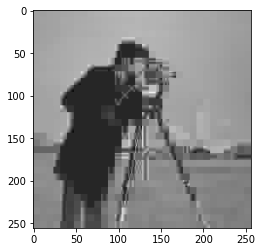

In [18]:
#Find IDCT of the given image after thresholding using IDCT function
imgidct1 = np.zeros((x,y), dtype=int)
for row in range(x//N):
        for col in range(y//N):
               imgidct1[row*N:(row+1)*N,col*N:(col+1)*N]= idct2(imgthresh[row*N:(row+1)*N,col*N:(col+1)*N])
plt.imshow(imgidct1, cmap="gray")

In [19]:
#Example of retaining top 50% of highest value components
A= [1,3,6,2,1,4,9,7]
B=sorted(A)
print(B)

[1, 1, 2, 3, 4, 6, 7, 9]


In [20]:
n=len(A)
Anew=np.zeros(n,dtype=int)
l= B[4:8]
for i in range(n):
  if A[i] in l:
    Anew[i]=A[i]
print(Anew)

[0 0 6 0 0 4 9 7]
